<a href="https://colab.research.google.com/github/Lakshmiprabha14/KG_FOSS/blob/main/DS_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import the necessary modules,packages and framework

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [9]:
customers_train = pd.read_csv("/content/C&T train dataset.csv")
customers_test = pd.read_csv("/content/C&T train dataset.csv")

In [10]:
customers_train.shape

(800, 21)

In [11]:
customers_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [12]:
customers_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [13]:
customers_train.describe()

,sno,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,788.000000,800.000000,796.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.130084,1.106833,11.499101,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


In [14]:
customers_test.describe()

,sno,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,788.000000,800.000000,796.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.130084,1.106833,11.499101,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


In [15]:
customers_train.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1


In [16]:
customers_test.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1


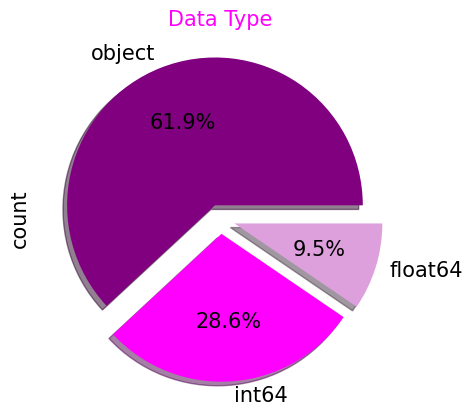

In [17]:
plt.rcParams.update({'font.size': 15})

customers_train.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.1f%%',
                                       shadow=True,
                                       colors=['purple', 'fuchsia', 'plum'])
plt.title('Data Type',
          color='fuchsia',
          loc='center',
          font='Lucida Calligraphy');

In [18]:
customers_train.isnull().sum()

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

In [19]:
customers_test.isnull().sum()

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

In [20]:
customers_train['acc_info'].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [21]:
mapping_account_info = {'A11': 1, 'A12': 2, 'A13': 3, 'A14': 4}


customers_train['acc_info'] = customers_train['acc_info'].replace(mapping_account_info)

In [22]:
customers_test['acc_info'] = customers_test['acc_info'].replace(mapping_account_info)

In [23]:
customers_train['duration_month'].sort_values()

234     4
314     4
734     4
527     4
430     5
       ..
255    60
616    60
714    60
373    60
677    72
Name: duration_month, Length: 800, dtype: int64

In [24]:
customers_train['duration_month'] = (customers_train['duration_month'] - customers_train['duration_month'].min()) / (customers_train['duration_month'].max() - customers_train['duration_month'].min())


In [25]:
customers_test['duration_month'] = (customers_test['duration_month'] - customers_test['duration_month'].min()) / (customers_test['duration_month'].max() - customers_test['duration_month'].min())

In [26]:
customers_train['duration_month'].sort_values()

234    0.000000
314    0.000000
734    0.000000
527    0.000000
430    0.014706
         ...   
255    0.823529
616    0.823529
714    0.823529
373    0.823529
677    1.000000
Name: duration_month, Length: 800, dtype: float64

In [27]:
customers_train['credit_history'].unique()

array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)

In [28]:
mapping_credit = {'A30':0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}

customers_train['credit_history'] = customers_train['credit_history'].replace(mapping_credit)

In [29]:
customers_test['credit_history'] = customers_test['credit_history'].replace(mapping_credit)

In [30]:
customers_train['purpose'].unique()

array(['A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410',
       'A48'], dtype=object)

In [31]:
mapping_purpose = {'A40':0, 'A41': 1, 'A42': 2, 'A43': 3, 'A44': 4, 'A45':5, 'A46' :6,  'A48':7, 'A49':8,'A410':9}
customers_train['purpose'] = customers_train['purpose'].replace(mapping_purpose)

In [32]:
customers_test['purpose'] = customers_test['purpose'].replace(mapping_purpose)

In [33]:
customers_train['savings_acc'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

In [34]:
mapping_savings = {'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4, 'A65':5}

customers_train['savings_acc'] = customers_train['savings_acc'].replace(mapping_savings)
customers_test['savings_acc'] = customers_test['savings_acc'].replace(mapping_savings)

In [35]:
customers_train['employment_st'].unique()

array(['A75', 'A73', 'A74', 'A71', 'A72', nan], dtype=object)

In [36]:
mapping_emp = {'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75':5, np.NaN:0}

customers_train['employment_st'] = customers_train['employment_st'].replace(mapping_emp)
customers_test['employment_st'] = customers_test['employment_st'].replace(mapping_emp)

In [37]:
customers_test['employment_st']=customers_test['employment_st'].fillna('0')
customers_train['employment_st']=customers_train['employment_st'].fillna('0')

In [38]:
customers_train['poi']=customers_train['poi'].fillna('0')
customers_test['poi']=customers_test['poi'].fillna('0')

In [39]:
customers_train['personal_status'].unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

In [40]:
mapping_pers = {'A91': 1, 'A92': 2, 'A93': 3, 'A94': 4}

customers_train['personal_status'] = customers_train['personal_status'].replace(mapping_pers)
customers_test['personal_status'] = customers_test['personal_status'].replace(mapping_pers)

In [41]:
customers_train['gurantors'].unique()

array(['A101', 'A103', 'A102', nan], dtype=object)

In [42]:
mapping_gurators = {'A101': 1, 'A102': 2, 'A103': 3}

customers_train['gurantors'] = customers_train['gurantors'].replace(mapping_gurators)
customers_test['gurantors'] = customers_test['gurantors'].replace(mapping_gurators)

In [43]:
customers_train['gurantors']=customers_train['gurantors'].fillna('0')
customers_test['gurantors']=customers_test['gurantors'].fillna('0')

In [44]:
customers_train['resident_since'].sort_values()

399    1
115    1
114    1
562    1
188    1
      ..
471    4
151    4
153    4
482    4
0      4
Name: resident_since, Length: 800, dtype: int64

In [45]:
customers_test['resident_since'].sort_values()

399    1
115    1
114    1
562    1
188    1
      ..
471    4
151    4
153    4
482    4
0      4
Name: resident_since, Length: 800, dtype: int64

In [46]:
customers_train['property_type'].unique()

array(['A121', 'A122', 'A124', 'A123'], dtype=object)

In [47]:
mapping_prop = {'A121': 1, 'A122': 2, 'A123': 3, 'A124' :4}

customers_train['property_type'] = customers_train['property_type'].replace(mapping_prop)
customers_test['property_type'] = customers_test['property_type'].replace(mapping_prop)

In [48]:
mean_value = customers_train['age'].mean()

In [49]:
customers_train['age'] = customers_train['age'].fillna(mean_value)
customers_test['age'] = customers_test['age'].fillna(mean_value)

In [50]:
customers_train['installment_type'].unique()

array(['A143', 'A141', 'A142'], dtype=object)

In [51]:
mapping_inst = {'A141': 1, 'A142': 2, 'A143': 3}

customers_train['installment_type'] = customers_train['installment_type'].replace(mapping_inst)
customers_test['installment_type'] = customers_test['installment_type'].replace(mapping_inst)

In [52]:
customers_train['housing_type'].unique()

array(['A152', 'A153', 'A151', nan], dtype=object)

In [53]:
mapping_house = {'A151': 1, 'A152': 2, 'A153': 3}

customers_train['housing_type'] = customers_train['housing_type'].replace(mapping_house)
customers_test['housing_type'] = customers_test['housing_type'].replace(mapping_house)

In [54]:
customers_train['housing_type'] = customers_train['housing_type'].fillna('0')
customers_test['housing_type'] = customers_test['housing_type'].fillna('0')

In [55]:
customers_train['credits_no'].sort_values()

799    1
386    1
660    1
661    1
383    1
      ..
432    3
590    4
653    4
65     4
197    4
Name: credits_no, Length: 800, dtype: int64

In [56]:
customers_test['credits_no'] = (customers_test['credits_no'] - customers_test['credits_no'].min()) / (customers_test['credits_no'].max() - customers_test['credits_no'].min())
customers_train['credits_no'] = (customers_train['credits_no'] - customers_train['credits_no'].min()) / (customers_train['credits_no'].max() - customers_train['credits_no'].min())

In [57]:
customers_train['job_type'].unique()

array(['A173', 'A172', 'A174', 'A171'], dtype=object)

In [58]:
mapping_job = {'A171':1 ,'A172':2, 'A173':3,'A174':4}

customers_train['job_type'] = customers_train['job_type'].replace(mapping_job)
customers_test['job_type'] = customers_test['job_type'].replace(mapping_job)

In [59]:
customers_train['liables'].sort_values()

0      1
505    1
506    1
508    1
509    1
      ..
666    2
460    2
110    2
106    2
368    2
Name: liables, Length: 800, dtype: int64

In [60]:
customers_test['liables'] = (customers_test['liables'] - customers_test['liables'].min()) / (customers_test['liables'].max() - customers_test['liables'].min())
customers_train['liables'] = (customers_train['liables'] - customers_train['liables'].min()) / (customers_train['liables'].max() - customers_train['liables'].min())

In [61]:
customers_train['telephone'].unique()

array(['A192', 'A191'], dtype=object)

In [62]:
mapping_telephone = {'A191':1, 'A192':2}

customers_train['telephone'] = customers_train['telephone'].replace(mapping_telephone)
customers_test['telephone'] = customers_test['telephone'].replace(mapping_telephone)

In [63]:
customers_train['foreigner'].unique()

array(['A201', 'A202'], dtype=object)

In [64]:
mapping_foreigner = {'A201':1, 'A202':2}

# Replace values using mapping dictionary
customers_train['foreigner'] = customers_train['foreigner'].replace(mapping_foreigner)
customers_test['foreigner'] = customers_test['foreigner'].replace(mapping_foreigner)

In [65]:
customers_train.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

In [66]:
customers_test.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
X = customers_train.drop(columns=['Group_no'])
y = customers_train['Group_no']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

*LINEAR REGRESSION*

In [69]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=4.5)

logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

print("The accuracy of Logistic Regression is {}".format(acc_log))


The accuracy of Logistic Regression is 75.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RANDOM FOREST

In [115]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("The accuracy of Random Forest is {}".format(acc_random_forest))

The accuracy of Random Forest is 79.58


SVC

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_svc = SVC(**best_params)

best_svc.fit(X_train, y_train)

Y_pred = best_svc.predict(X_test)

acc_svc = round(best_svc.score(X_train, y_train) * 100, 2)

print("Best Parameters:", best_params)
print("Best Score:", best_score)

print("The accuracy of SVC is {}".format(acc_svc))


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.4625
The accuracy of SVC is 100.0


DECISION TREE

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=49)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_tree)


Accuracy: 0.6125


KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn
print("The accuracy of KNN is {}".format(acc_knn))

The accuracy of KNN is 52.78


Best model

In [117]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, accuracy_tree]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
0,Support Vector Machines,100.0000
3,Random Forest,79.5800
2,Logistic Regression,75.0000
1,KNN,52.7800
4,Decision Tree,0.6125


In [118]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances.head(15))

                 importance
feature                    
duration_month        0.340
poi                   0.106
job_type              0.082
purpose               0.059
property_type         0.057
sno                   0.056
age                   0.049
telephone             0.048
personal_status       0.034
credit_history        0.025
employment_st         0.024
credits_no            0.022
housing_type          0.020
acc_info              0.020
resident_since        0.016


In [119]:
columns_to_include = ['sno', 'acc_info', 'duration_month', 'credit_history', 'purpose', 'savings_acc', 'employment_st', 'poi', 'personal_status', 'gurantors', 'resident_since', 'property_type', 'age', 'installment_type', 'housing_type', 'credits_no', 'job_type', 'liables', 'telephone', 'foreigner']

x_real = customers_test[columns_to_include]

In [120]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(x_real)

In [121]:

output = pd.DataFrame({'sno': customers_test['sno'], 'Group_no': Y_pred})

# Save the DataFrame as a CSV file
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
